# Problem Statement : Drug Classification using Naive Bayes

In [2]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import DistanceMetric
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder,OneHotEncoder,OrdinalEncoder
from sklearn.metrics import accuracy_score,classification_report
from mixed_naive_bayes import MixedNB
import pickle
from sklearn.preprocessing import FunctionTransformer , PowerTransformer
import scipy.stats as ss
from sklearn.model_selection import train_test_split

In [3]:
#importing the dataset
data=pd.read_csv(r"C:\Users\LENOVO\Downloads\drug200.csv")

In [4]:
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


# EDA

In [5]:
#info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [6]:
#Statistical insights
data.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [7]:
#Checking for null values, if any
data.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

No null values in the dataset

In [8]:
#Checking if the dataset is balanced or not
data["Drug"].value_counts()

DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

Imbalanced dataset

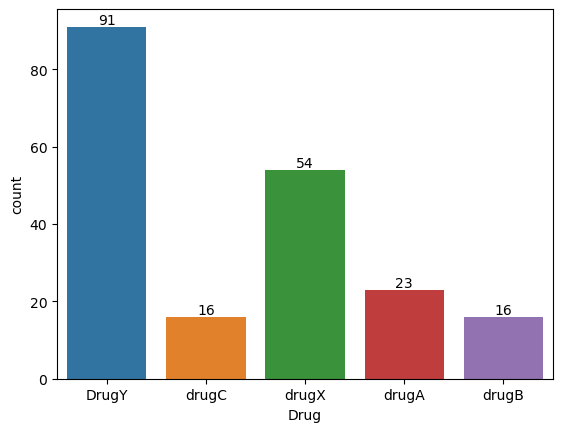

In [9]:
#Data visualization
a=sns.countplot(data=data,x=data["Drug"])
for i in a.containers:
    a.bar_label(i)

# Feature Engineering

In [10]:
#Extracting feature variables and class label
fv=data.iloc[:,0:-1]
cv=data.iloc[:,-1]

In [11]:
fv

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043
...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567
196,16,M,LOW,HIGH,12.006
197,52,M,NORMAL,HIGH,9.894
198,23,M,NORMAL,NORMAL,14.020


In [12]:
cv.unique()

array(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [13]:
#cv=cv.map({"DrugY":0,"drugC":1,"drugX":2,"drugA":3,"drugB":4})

In [14]:
fv.corr()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9188\2585144357.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  fv.corr()


,Age,Na_to_K
Age,1.000000,-0.063119
Na_to_K,-0.063119,1.000000


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9188\2882092090.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(fv.corr(),annot=True)


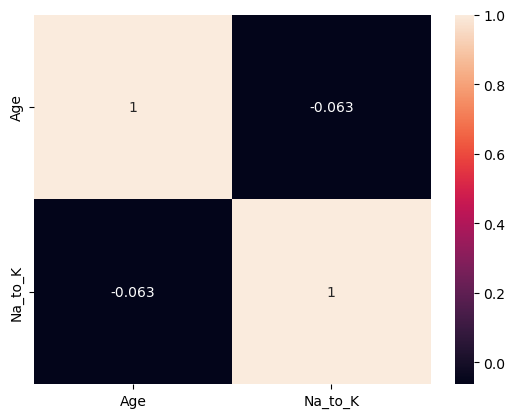

In [16]:
sns.heatmap(fv.corr(),annot=True)
plt.show()

In [15]:
#Checking if the numerical feature variables following Gaussian distribution or not

In [17]:
import scipy.stats as ss

In [18]:
#Dividing the dataset to train,test
x_train,x_test,y_train,y_test=train_test_split(fv,cv,test_size=0.2,stratify=cv,random_state=1)

In [19]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160 entries, 41 to 49
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          160 non-null    int64  
 1   Sex          160 non-null    object 
 2   BP           160 non-null    object 
 3   Cholesterol  160 non-null    object 
 4   Na_to_K      160 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 7.5+ KB


In [20]:
x_train["Sex"].unique()

array(['F', 'M'], dtype=object)

In [21]:
x_train["BP"].unique()

array(['HIGH', 'NORMAL', 'LOW'], dtype=object)

In [22]:
x_train["Cholesterol"].unique()

array(['NORMAL', 'HIGH'], dtype=object)

In [23]:
x_train["BP"]=x_train["BP"].astype("category")

In [24]:
x_train["Cholesterol"]=x_train["Cholesterol"].astype("category")

In [25]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160 entries, 41 to 49
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Age          160 non-null    int64   
 1   Sex          160 non-null    object  
 2   BP           160 non-null    category
 3   Cholesterol  160 non-null    category
 4   Na_to_K      160 non-null    float64 
dtypes: category(2), float64(1), int64(1), object(1)
memory usage: 5.6+ KB


In [26]:
# from this x_train and y_train we need to perform the EDA to know more about the data
# for this firstly concate the x_train and y_train
eda1=pd.concat([x_train,y_train],axis=1)

In [27]:
eda1.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
41,58,F,HIGH,NORMAL,14.239,drugB
129,32,F,NORMAL,HIGH,7.477,drugX
65,68,F,NORMAL,NORMAL,27.050,DrugY
39,15,M,NORMAL,HIGH,9.084,drugX
64,60,F,HIGH,HIGH,13.303,drugB


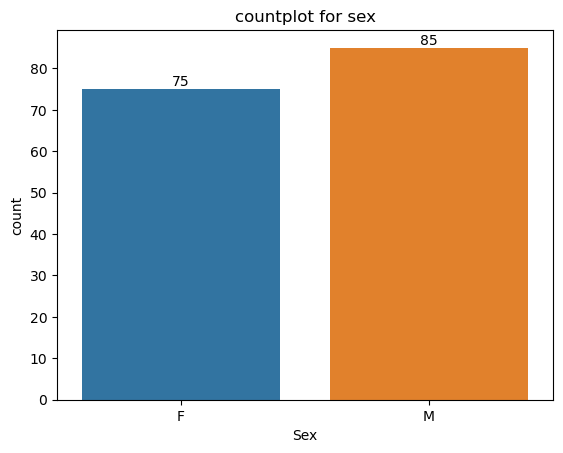

In [28]:
# plotting the countplot to understand the sex column
a=sns.countplot(x=eda1["Sex"])
for i in a.containers:
    a.bar_label(i)

plt.title("countplot for sex")
plt.show()

There are 75 females and 85 males

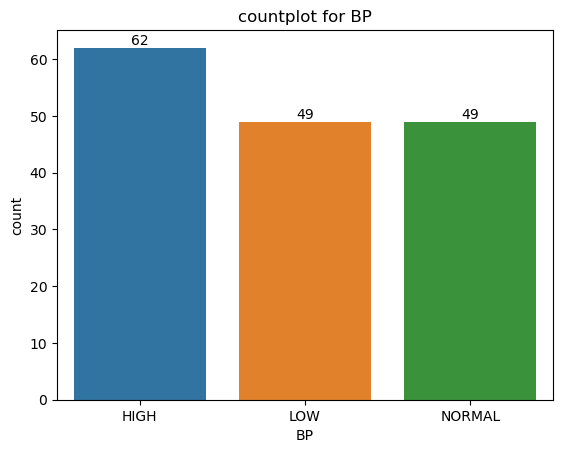

In [29]:
 #plotting the countplot to understand the sex column
a=sns.countplot(x=eda1["BP"])
for i in a.containers:
    a.bar_label(i)
plt.title("countplot for BP")
plt.show()

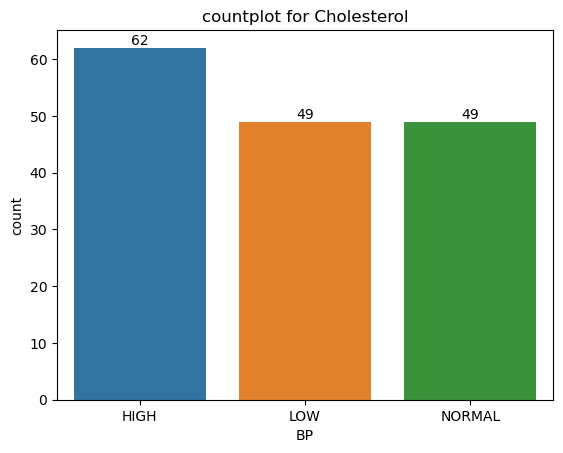

In [30]:
# plotting the countplot to understand the Cholesterol column
a=sns.countplot(x=eda1["BP"])
for i in a.containers:
    a.bar_label(i)
plt.title("countplot for Cholesterol")
plt.show()

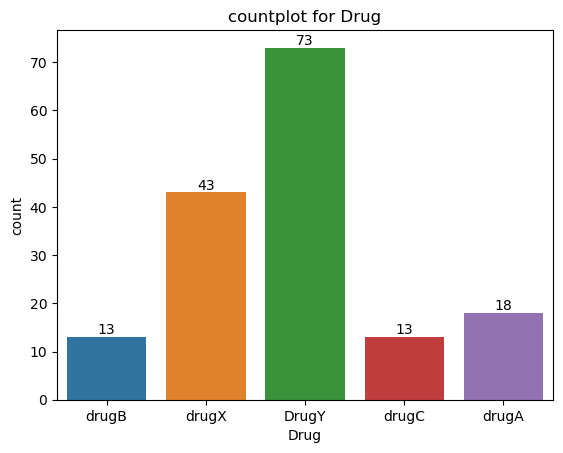

In [31]:
# plotting the countplot to understand the Drug column
a=sns.countplot(x=eda1["Drug"])
for i in a.containers:
    a.bar_label(i)
plt.title("countplot for Drug")
plt.show()

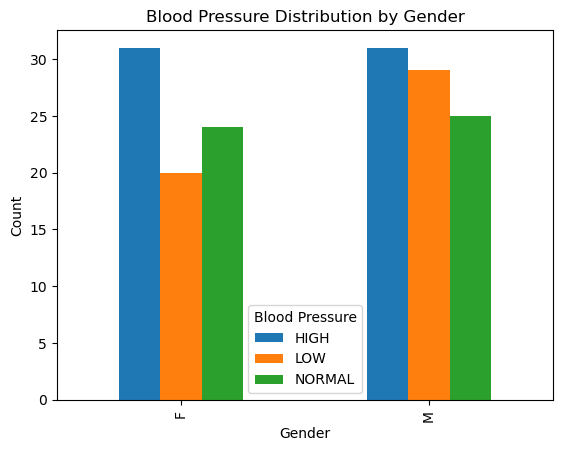

In [32]:
# Group by 'Sex' with respect to 'BP' and calculate the count
grouped_data = eda1.groupby(['Sex', 'BP']).size().unstack()

# Plotting the data
ax = grouped_data.plot(kind='bar')
ax.set_title('Blood Pressure Distribution by Gender')
ax.set_ylabel('Count')
ax.set_xlabel('Gender')
ax.legend(title='Blood Pressure')

plt.show()

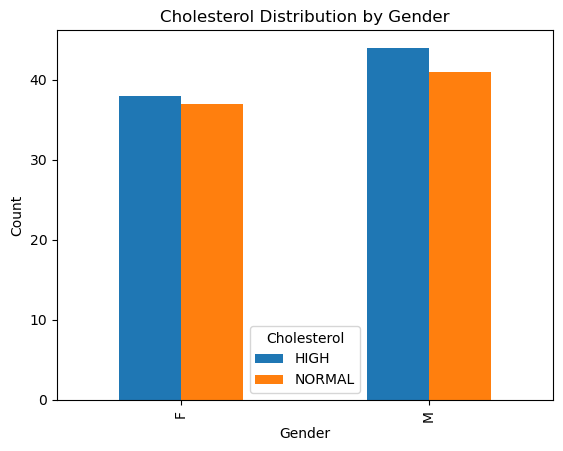

In [33]:
# Group by 'Sex' with respect to 'Cholesterol' and calculate the count
g_data = eda1.groupby(['Sex', 'Cholesterol']).size().unstack()

# Plotting the data
ax = g_data.plot(kind='bar')
ax.set_title('Cholesterol Distribution by Gender')
ax.set_ylabel('Count')
ax.set_xlabel('Gender')
ax.legend(title='Cholesterol')

plt.show()

Males are having high cholesterol

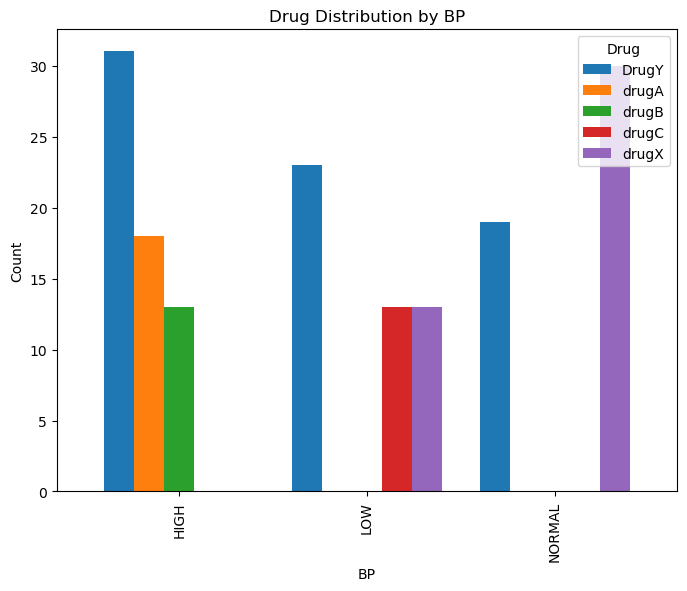

In [35]:
# Group by 'BP' with respect to 'Drug' and calculate the count
g_data1 = eda1.groupby(['BP', 'Drug']).size().unstack()

# Plotting the data
ax = g_data1.plot(kind='bar', figsize=(8, 6), width=0.8)
ax.set_title('Drug Distribution by BP')
ax.set_ylabel('Count')
ax.set_xlabel('BP')
ax.legend(title='Drug')

plt.show()


DrugY is preferred for people having different BP
drugA,drugB is preferred for HIGH BP
drugC , drugX is prefered for LOW and NORMAL BP

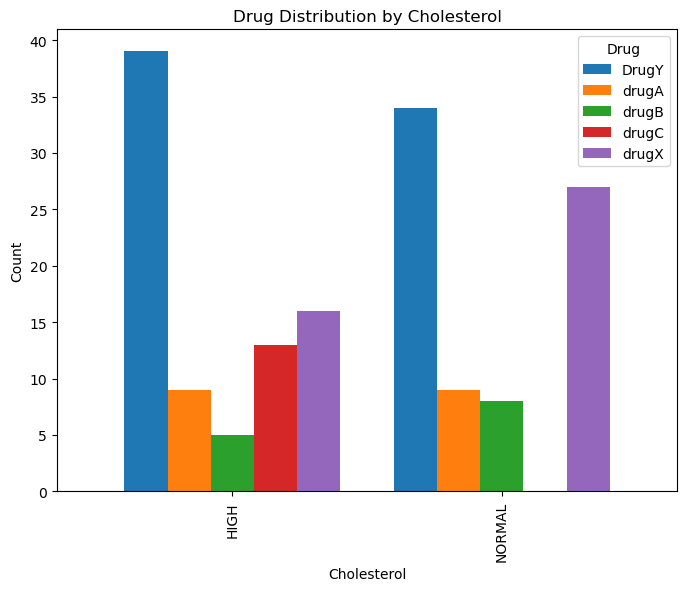

In [36]:
# Group by 'BP' with respect to 'Drug' and calculate the count
g_data1 = eda1.groupby(['Cholesterol', 'Drug']).size().unstack()

# Plotting the data
ax = g_data1.plot(kind='bar', figsize=(8, 6), width=0.8)
ax.set_title('Drug Distribution by Cholesterol')
ax.set_ylabel('Count')
ax.set_xlabel('Cholesterol')
ax.legend(title='Drug')

plt.show()

DrugY is mostly used by the people having Cholesterol either it is normal or normal and followed by drugX

In [37]:
#Predictive Modelling

In [38]:
# seperating the numerical and categorical columns of x_train to perfom transformation using pipeline
numerical_data=x_train.select_dtypes(include=["int64","float64"])
cat_data=x_train.select_dtypes(include=["object"])
ord_data=x_train.select_dtypes(include=["category"])

In [39]:
#Pipeline for numerical columns to perform actions like impute missing values,scaling and transformtion
num_p=Pipeline([("imputing_n",SimpleImputer()),("scaling",PowerTransformer())])

In [40]:
##Pipeline for categorical columns to perform actions like impute missing values,scaling and transformtion

In [41]:
cp=Pipeline([("imputing_c",SimpleImputer(strategy="most_frequent")),("Encoder",OneHotEncoder())])


In [42]:
op=Pipeline([("impute_c",SimpleImputer(strategy="most_frequent")),("Encoder1",OrdinalEncoder())])

In [43]:
# creating column transformer using pipeline created
ct=ColumnTransformer(transformers=[("numerical",num_p,numerical_data.columns),("nominal",cp,cat_data.columns),
                                   ("ordinal",op,ord_data.columns)],remainder="passthrough")

In [44]:
ct

ColumnTransformer(remainder='passthrough',
                  transformers=[('numerical',
                                 Pipeline(steps=[('imputing_n',
                                                  SimpleImputer()),
                                                 ('scaling',
                                                  PowerTransformer())]),
                                 Index(['Age', 'Na_to_K'], dtype='object')),
                                ('nominal',
                                 Pipeline(steps=[('imputing_c',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('Encoder', OneHotEncoder())]),
                                 Index(['Sex'], dtype='object')),
                                ('ordinal',
                                 Pipeline(steps=[('impute_c',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('Encoder1',
                                                  OrdinalEncoder())]),
                                 Index(['BP', 'Cholesterol'], dtype='object'))])

In [45]:
#Final pipeline
pipeline = Pipeline(steps=[('preprocessor', ct)])


In [46]:
mnb=MixedNB(categorical_features=[2,3,4,5])

In [53]:
#Fitting the final model
model=mnb.fit(pipeline.fit_transform(x_train),y_train)

C:\Users\LENOVO\anaconda3\lib\site-packages\mixed_naive_bayes\mixed_naive_bayes.py:423: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if categorical_features == 'all':
C:\Users\LENOVO\anaconda3\lib\site-packages\mixed_naive_bayes\mixed_naive_bayes.py:163: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif self.categorical_features == 'all':


# Performance of the model

In [47]:

#transform the train data by using column transformer pipeline 
fx_train=ct.fit_transform(x_train)

In [48]:
fx_train.shape

(160, 6)

In [49]:
# transforms the test data           
fx_test=ct.transform(x_test)

In [57]:
model=mnb.fit(fx_train,y_train)
predict=model.predict(fx_test)
accuracy_score(y_test,predict)

0.975

In [58]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        18
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         3
           4       1.00      0.91      0.95        11

    accuracy                           0.97        40
   macro avg       0.99      0.98      0.99        40
weighted avg       0.98      0.97      0.97        40



In [59]:
#Deployment

In [60]:
import pickle

In [61]:
#Dumping te model
pickle.dump(pipeline,open(r"C:\Users\LENOVO\Downloads\pre11.pkl","wb"))
pickle.dump(model,open(r"C:\Users\LENOVO\Downloads\model11.pkl","wb"))
